### Import modules

In [1]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.2.3
1.20.1


### Membaca data set 

In [2]:
df = pd.read_excel('./dataset/laporan_iklim_harian_1.xlsx')
df.head(10)

,Tanggal,Tavg,RH_avg,ss,ff_avg,RR
0,01-01-2015,25.3,88.0,0.0,4.0,23.9
1,02-01-2015,26.3,85.0,0.0,4.0,10.5
2,03-01-2015,25.8,90.0,1.9,4.0,9.7
3,04-01-2015,NaN,NaN,NaN,NaN,NaN
4,05-01-2015,26.9,81.0,0.5,5.0,5.9
5,06-01-2015,27.5,78.0,8.2,5.0,0.0
6,07-01-2015,28.0,79.0,4.5,5.0,0.0
7,08-01-2015,NaN,NaN,NaN,NaN,NaN
8,09-01-2015,27.9,78.0,4.4,6.0,0.0
9,10-01-2015,NaN,NaN,NaN,NaN,NaN


### Ukuran datatset

In [3]:
df.shape # bentuk/dimensi dataset (baris,kolom)

(2246, 6)

### Mengganti nama kolom
    Tavg  : Temperatur rata-rata (°C) --> temperatur 
    RH_avg: Kelembapan rata-rata (%) --> kelembapan 
    ss    : Lamanya penyinaran matahari (jam) --> lama_penyinaran 
    ff_avg: Kecepatan angin rata-rata (m/s) --> kecepatan_angin 
    RR    : Curah hujan (mm) --> curah_hujan

In [4]:
df = df.rename(columns={'Tanggal':'tanggal','Tavg':'temperatur', 'RH_avg':'kelembapan',
                        'ss':'lama_penyinaran','ff_avg':'kecepatan_angin', 'RR':'curah_hujan'})
df.head()

,tanggal,temperatur,kelembapan,lama_penyinaran,kecepatan_angin,curah_hujan
0,01-01-2015,25.3,88.0,0.0,4.0,23.9
1,02-01-2015,26.3,85.0,0.0,4.0,10.5
2,03-01-2015,25.8,90.0,1.9,4.0,9.7
3,04-01-2015,NaN,NaN,NaN,NaN,NaN
4,05-01-2015,26.9,81.0,0.5,5.0,5.9


### Mengenali apakah ada missing values

In [5]:
df.isna().values.any() # mendeteksi keberadaan nilai kosong

True

### Menghapus baris yang mengandung missing values

In [6]:
df = df.dropna(axis='rows')
df.shape

(1944, 6)

In [7]:
df.isna().sum()

tanggal            0
temperatur         0
kelembapan         0
lama_penyinaran    0
kecepatan_angin    0
curah_hujan        0
dtype: int64

### Menghapus row di kolom curah hujan yang mengandung 8888 dan 9999
8888 : Data tidak terukur <br/>
9999 : Tidak Ada Data (tidak dilakukan pengukuran)

In [8]:
df = df[(df['curah_hujan'] != 8888) & (df['curah_hujan'] != 9999)]
df.shape

(1858, 6)

### Mengenali duplicat baris

In [9]:
df.duplicated().value_counts() # hitung jumlah duplikasi data

False    1858
dtype: int64

### Mereset ulang index dari nol

In [10]:
df = df.reset_index(drop=True)
df

,tanggal,temperatur,kelembapan,lama_penyinaran,kecepatan_angin,curah_hujan
0,01-01-2015,25.3,88.0,0.0,4.0,23.9
1,02-01-2015,26.3,85.0,0.0,4.0,10.5
2,03-01-2015,25.8,90.0,1.9,4.0,9.7
3,05-01-2015,26.9,81.0,0.5,5.0,5.9
4,06-01-2015,27.5,78.0,8.2,5.0,0.0
...,...,...,...,...,...,...
1853,21-03-2021,28.2,78.0,4.9,3.0,1.6
1854,22-03-2021,28.5,76.0,8.0,3.0,0.0
1855,23-03-2021,27.5,79.0,10.1,3.0,0.0
1856,24-03-2021,27.8,74.0,8.6,4.0,0.0


### Menambahkan kolom status dari kategori curah_hujan
sumber : https://www.bmkg.go.id/cuaca/probabilistik-curah-hujan.bmkg

In [11]:
df['status'] = pd.cut(df['curah_hujan'],
                      bins = [0, 0.5, 20, 50, 100, 150],
                      labels=['berawan', 'hujan ringan', 'hujan sedang',
                              'hujan lebat', 'hujan sangat lebat'],
                      include_lowest=True)

### Mengubah kolom status menjadi tipe data ordinal

In [12]:
from pandas.api.types import CategoricalDtype

tingkat_curah_hujan = CategoricalDtype(['berawan', 'hujan ringan', 'hujan sedang',
                                        'hujan lebat', 'hujan sangat lebat'], 
                                    ordered=True)

df['status'] = df['status'].astype(tingkat_curah_hujan)
df.dtypes

tanggal              object
temperatur          float64
kelembapan          float64
lama_penyinaran     float64
kecepatan_angin     float64
curah_hujan         float64
status             category
dtype: object

### Menghapus kolom curah_hujan
Karena kolom status sudah mewakilkan kolom curah_hujan, maka kolom curah_hujan tidak diperlukan

In [13]:
df.drop(columns='curah_hujan', inplace=True)
df.sort_values('status') # Tampilkan berdasarkan urutan status

,tanggal,temperatur,kelembapan,lama_penyinaran,kecepatan_angin,status
1857,25-03-2021,27.6,78.0,6.1,3.0,berawan
884,09-01-2018,27.3,80.0,3.8,2.0,berawan
882,07-01-2018,27.4,81.0,1.6,3.0,berawan
881,06-01-2018,27.7,74.0,1.5,5.0,berawan
880,05-01-2018,27.7,70.0,5.4,5.0,berawan
...,...,...,...,...,...,...
1510,01-02-2020,25.5,92.0,4.0,2.0,hujan sangat lebat
705,14-06-2017,26.7,83.0,0.0,2.0,hujan sangat lebat
1482,01-01-2020,26.7,88.0,0.5,2.0,hujan sangat lebat
451,18-06-2016,24.7,89.0,2.2,2.0,hujan sangat lebat


### Mengeksport dataframe menjadi excel dan menyimpannya

In [14]:
# from pandas import ExcelWriter
# from pandas import ExcelFile

In [15]:
# writer = pd.ExcelWriter('./dataset/3KA32_laporan_iklim_harian_baru.xlsx')
# df.to_excel(writer, index = False, sheet_name='Sheet1')
# writer.save()

### Mengindentifikasi ukuran datatset

In [16]:
df.shape # bentuk/dimensi dataset (baris,kolom)

(1858, 6)

### Melihat daftar kolom

In [17]:
df.columns # daftar nama kolom

Index(['tanggal', 'temperatur', 'kelembapan', 'lama_penyinaran',
       'kecepatan_angin', 'status'],
      dtype='object')

### Mengidentifikasi tipe data pada tiap kolom

In [18]:
df.dtypes # tipe data untuk tiap kolom

tanggal              object
temperatur          float64
kelembapan          float64
lama_penyinaran     float64
kecepatan_angin     float64
status             category
dtype: object

### Mendeksripsikan dataset

In [19]:
df.describe() # deskripsi data

,temperatur,kelembapan,lama_penyinaran,kecepatan_angin
count,1858.000000,1858.000000,1858.000000,1858.000000
mean,27.773735,78.315393,5.448924,2.420344
std,0.974803,6.290969,3.069799,0.762867
min,23.700000,55.000000,0.000000,1.000000
25%,27.200000,74.000000,3.000000,2.000000
50%,27.800000,79.000000,5.900000,2.000000
75%,28.500000,83.000000,8.000000,3.000000
max,30.400000,96.000000,11.300000,6.000000


### Melihat Korelasi Matrix

In [20]:
df.corr() # korelasi antar kolom

,temperatur,kelembapan,lama_penyinaran,kecepatan_angin
temperatur,1.000000,-0.568258,0.288921,0.091830
kelembapan,-0.568258,1.000000,-0.367604,-0.233428
lama_penyinaran,0.288921,-0.367604,1.000000,0.044424
kecepatan_angin,0.091830,-0.233428,0.044424,1.000000


## Visualisasi Data 

### Import Modules

In [21]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline 

### Pie Chart 

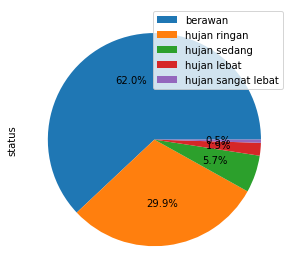

In [22]:
df['status'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()
plt.show()

### Heatmap

<AxesSubplot:>

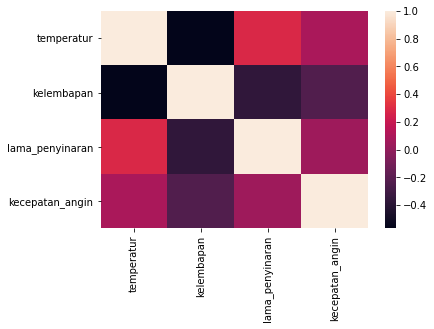

In [23]:
sns.heatmap(data=df.corr())

### Bar Plot

In [24]:
df['status'].value_counts() # menghitung jumlah setiap kategori

berawan               1152
hujan ringan           556
hujan sedang           105
hujan lebat             36
hujan sangat lebat       9
Name: status, dtype: int64

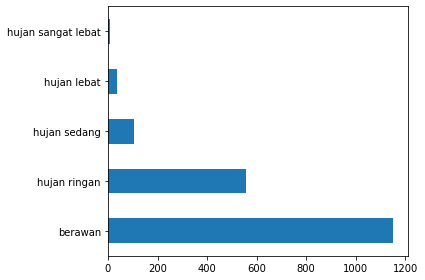

In [25]:
df['status'].value_counts().plot.barh()
plt.tight_layout()
plt.show()

### Scatter Plot

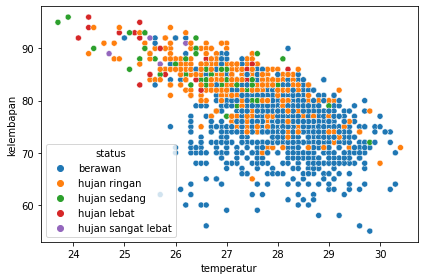

In [26]:
sns.scatterplot(x='temperatur', y='kelembapan', data=df, hue='status')
plt.tight_layout()

### Pair Plot

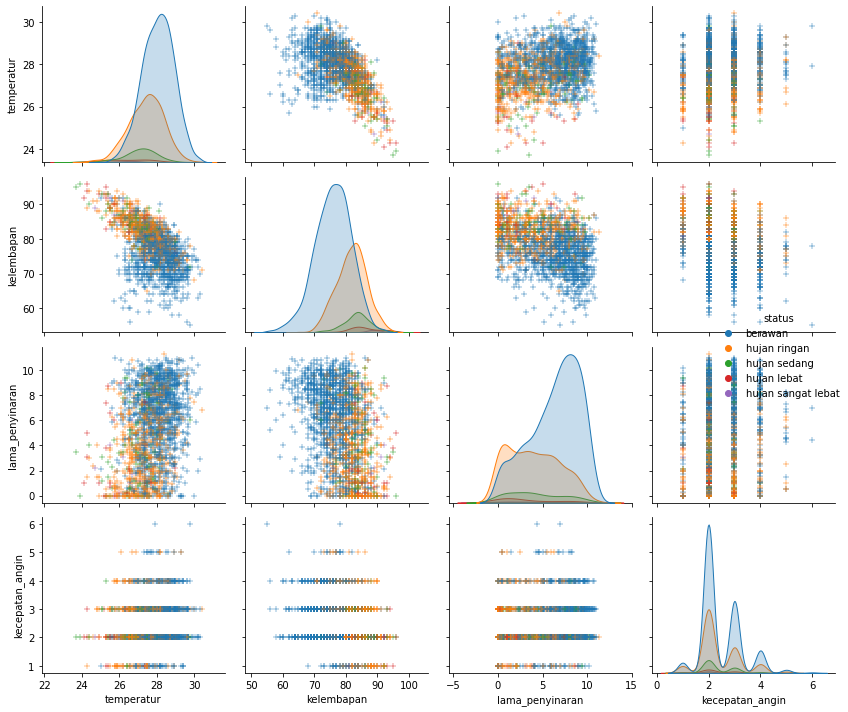

In [27]:
sns.pairplot(df, hue='status', markers='+')
plt.tight_layout()

## Menyiapkan dataset

#### Dataset: Features & Class Label

In [28]:
X = df.drop(columns=['status','tanggal']) # menempatkan features ke dalam variable X
X.head() # tampilkan 5 baris pertama

,temperatur,kelembapan,lama_penyinaran,kecepatan_angin
0,25.3,88.0,0.0,4.0
1,26.3,85.0,0.0,4.0
2,25.8,90.0,1.9,4.0
3,26.9,81.0,0.5,5.0
4,27.5,78.0,8.2,5.0


In [29]:
y = df['status'] # menempatkan class label (target) ke dalam variabel y
y.head() # tampilkan 5 baris pertama

0    hujan sedang
1    hujan ringan
2    hujan ringan
3    hujan ringan
4         berawan
Name: status, dtype: category
Categories (5, object): ['berawan' < 'hujan ringan' < 'hujan sedang' < 'hujan lebat' < 'hujan sangat lebat']

### Memisahkan dataset menjadi training set dan testing set 

#### Import Modules

In [30]:
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set

In [31]:
# membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(1300, 4)
(1300,)

testing dataset:
(558, 4)
(558,)


### Mengindentifikasi ukuran datatset

In [32]:
df.shape # bentuk/dimensi dataset (baris,kolom)

(1858, 6)

### Melihat daftar kolom

In [33]:
df.columns # daftar nama kolom

Index(['tanggal', 'temperatur', 'kelembapan', 'lama_penyinaran',
       'kecepatan_angin', 'status'],
      dtype='object')

### Mengidentifikasi tipe data pada tiap kolom

In [34]:
df.dtypes # tipe data untuk tiap kolom

tanggal              object
temperatur          float64
kelembapan          float64
lama_penyinaran     float64
kecepatan_angin     float64
status             category
dtype: object

### Mendeksripsikan dataset

In [35]:
df.describe() # deskripsi data

,temperatur,kelembapan,lama_penyinaran,kecepatan_angin
count,1858.000000,1858.000000,1858.000000,1858.000000
mean,27.773735,78.315393,5.448924,2.420344
std,0.974803,6.290969,3.069799,0.762867
min,23.700000,55.000000,0.000000,1.000000
25%,27.200000,74.000000,3.000000,2.000000
50%,27.800000,79.000000,5.900000,2.000000
75%,28.500000,83.000000,8.000000,3.000000
max,30.400000,96.000000,11.300000,6.000000


### Melihat Korelasi Matrix

In [36]:
df.corr() # korelasi antar kolom

,temperatur,kelembapan,lama_penyinaran,kecepatan_angin
temperatur,1.000000,-0.568258,0.288921,0.091830
kelembapan,-0.568258,1.000000,-0.367604,-0.233428
lama_penyinaran,0.288921,-0.367604,1.000000,0.044424
kecepatan_angin,0.091830,-0.233428,0.044424,1.000000


## Visualisasi Data 

### Import Modules

In [37]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline 

### Pie Chart 

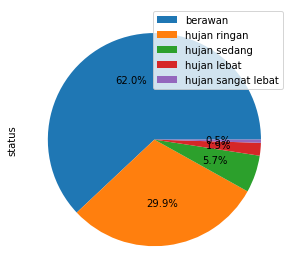

In [38]:
df['status'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()
plt.show()

### Heatmap

<AxesSubplot:>

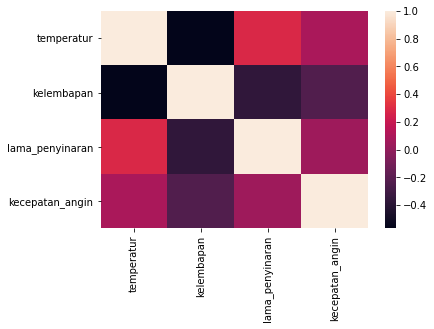

In [39]:
sns.heatmap(data=df.corr())

### Bar Plot

In [40]:
df['status'].value_counts() # menghitung jumlah setiap kategori

berawan               1152
hujan ringan           556
hujan sedang           105
hujan lebat             36
hujan sangat lebat       9
Name: status, dtype: int64

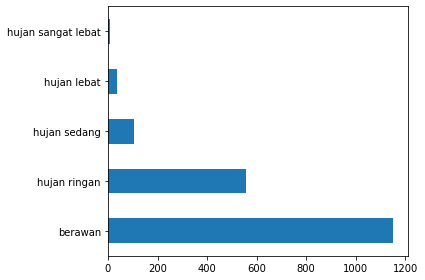

In [41]:
df['status'].value_counts().plot.barh()
plt.tight_layout()
plt.show()

### Scatter Plot

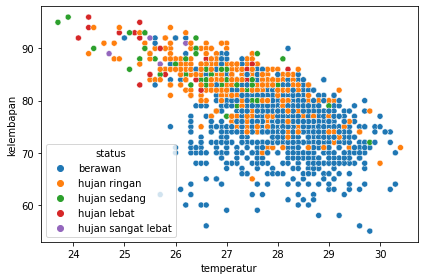

In [42]:
sns.scatterplot(x='temperatur', y='kelembapan', data=df, hue='status')
plt.tight_layout()

### Pair Plot

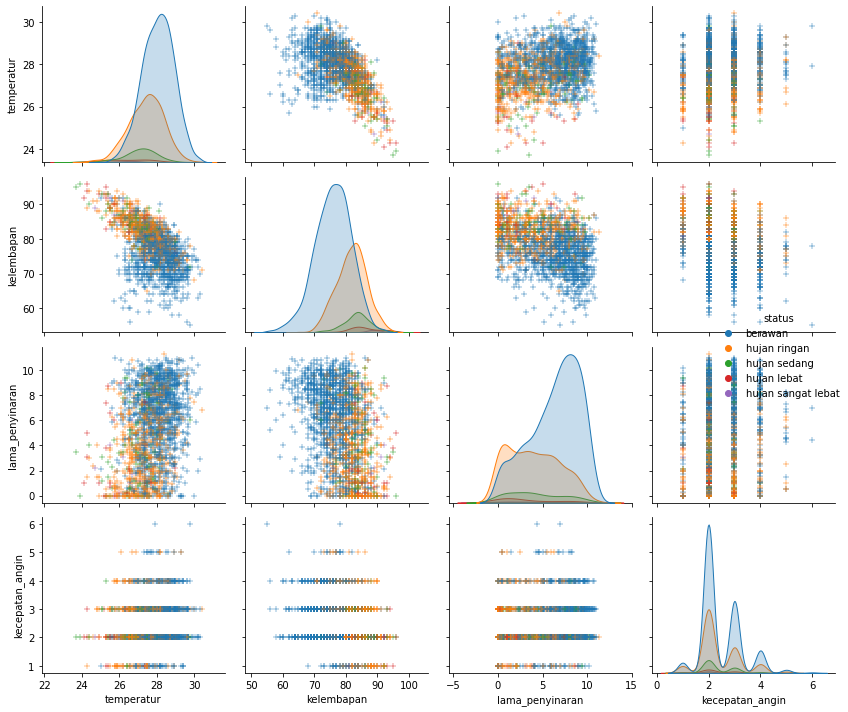

In [43]:
sns.pairplot(df, hue='status', markers='+')
plt.tight_layout()

## Menyiapkan dataset

#### Dataset: Features & Class Label

In [44]:
X = df.drop(columns=['status','tanggal']) # menempatkan features ke dalam variable X
X.head() # tampilkan 5 baris pertama

,temperatur,kelembapan,lama_penyinaran,kecepatan_angin
0,25.3,88.0,0.0,4.0
1,26.3,85.0,0.0,4.0
2,25.8,90.0,1.9,4.0
3,26.9,81.0,0.5,5.0
4,27.5,78.0,8.2,5.0


In [45]:
y = df['status'] # menempatkan class label (target) ke dalam variabel y
y.head() # tampilkan 5 baris pertama

0    hujan sedang
1    hujan ringan
2    hujan ringan
3    hujan ringan
4         berawan
Name: status, dtype: category
Categories (5, object): ['berawan' < 'hujan ringan' < 'hujan sedang' < 'hujan lebat' < 'hujan sangat lebat']

### Memisahkan dataset menjadi training set dan testing set 

#### Import Modules

In [46]:
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set

In [47]:
# membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(1300, 4)
(1300,)

testing dataset:
(558, 4)
(558,)


## Model Classification

### K Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(X_train,y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 3000)
model_logreg.fit(X_train,y_train)
# y_pred = model_logreg.predict(X_test)

LogisticRegression(max_iter=3000)

### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
# y_pred = model_rf.predict(X_test)

RandomForestClassifier()

## Model Clustering

In [51]:
from sklearn.preprocessing import MinMaxScaler # preprocessing dataset

In [52]:
mms = MinMaxScaler()
mms.fit(X_train)
Xnorm = mms.transform(X_train)
Xnorm.shape

(1300, 4)

### K Means Clustering

#### Metode Elbow

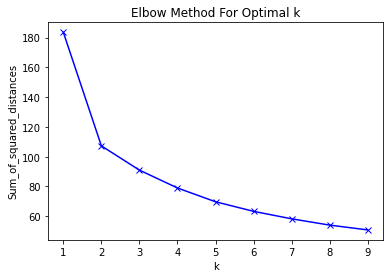

In [53]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
for k in range(1,10):
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(Xnorm)
    Sum_of_squared_distances.append(km.inertia_)
# Visualisasi hasil metode ke dalam grafik
plt.plot(range(1,10), Sum_of_squared_distances, 'bx-') 
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

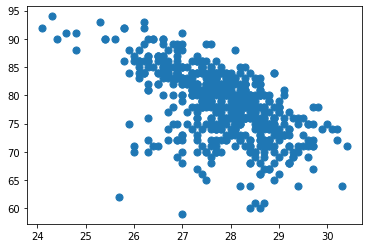

In [54]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], s=50);

In [55]:
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(X_train,y_train)
y_pred = model_kmeans.predict(X_test)

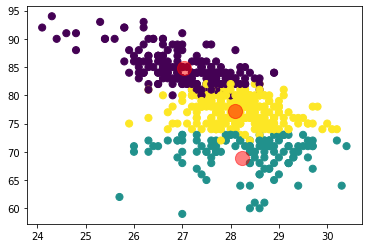

In [56]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

### Birch

In [57]:
from sklearn.cluster import Birch
model_birch = Birch(n_clusters = 3)
model_birch = model_birch.fit(X_train, y_train)
y_pred = model_birch.predict(X_test)

### Mengukur Tngkat akurasi model 

In [58]:
from sklearn import metrics # evaluasi performa model
models = [model_knn, model_logreg, model_rf, model_kmeans, model_birch]
accuracies = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = metrics.rand_score(y_test, y_pred)
    accuracies.append(accuracy)
print(accuracies)

[0.582723628243985, 0.6399426008506914, 0.5899757404940703, 0.5554912067334608, 0.5633288932646088]


### Dalam bentuk Grafik

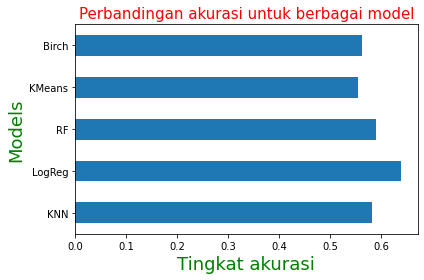

In [59]:
accuracy = pd.DataFrame({'labels':['KNN', 'LogReg','RF', 'KMeans', 'Birch'], 'value':accuracies})
ax = accuracy.plot.barh(x='labels', y='value', legend=False)
plt.title('Perbandingan akurasi untuk berbagai model', fontsize=15, color='r')
plt.ylabel('Models', fontsize=18, color='g')
plt.xlabel('Tingkat akurasi', fontsize=18, color='g')
plt.tight_layout()
plt.show()